In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Definindo parâmetros
num_rows = 102348  # Número de linhas da tabela

In [ ]:
# Gerando dados simulados
np.random.seed(42)  # Para reprodutibilidade

In [ ]:
data = {
    'ID do Produto': np.random.randint(100, 200, size=num_rows),
    'Data da Venda': pd.date_range(start='2023-01-01', periods=num_rows, freq='H'),
    'Quantidade Vendida': np.random.randint(1, 20, size=num_rows),
    'Preço Unitário': np.random.uniform(5.0, 100.0, size=num_rows),
    'Total Vendas': np.nan,
    'Categoria do Produto': np.random.choice(['Eletrônicos', 'Roupas', 'Alimentos', 'Móveis'], size=num_rows),
    'Método de Pagamento': np.random.choice(['Cartão de Crédito', 'Boleto', 'PayPal', 'Dinheiro'], size=num_rows),
    'ID do Cliente': np.random.randint(1, 500, size=num_rows),
    'Localização do Cliente': np.random.choice(['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'Curitiba'], size=num_rows),
    'Avaliação do Cliente': np.random.choice([1, 2, 3, 4, 5], size=num_rows),
}

<ipython-input-4-dd602ffc9803>:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'Data da Venda': pd.date_range(start='2023-01-01', periods=num_rows, freq='H'),


In [ ]:
# Criando DataFrame
df = pd.DataFrame(data)

In [ ]:
# Calculando Total Vendas
df['Total Vendas'] = df['Quantidade Vendida'] * df['Preço Unitário']

In [ ]:
# Exportando para Excel
df.to_excel('tabela_vendas_completa.xlsx', index=False)

In [ ]:
print("Arquivo 'tabela_vendas_completa.xlsx' gerado com sucesso!")

Arquivo 'tabela_vendas_completa.xlsx' gerado com sucesso!


In [ ]:
from google.colab import files


In [ ]:
# Baixando o arquivo
files.download('tabela_vendas_completa.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 1. Importar Bibliotecas Necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
# 2. Carregar os Dados
df = pd.read_excel('tabela_vendas_completa.xlsx')

In [ ]:
# 3. Pré-processar os Dados
# Conversão de categorias em variáveis dummy
df = pd.get_dummies(df, columns=['Categoria do Produto', 'Método de Pagamento', 'Localização do Cliente'], drop_first=True)

In [ ]:
# Selecionando características e variável alvo
X = df.drop(columns=['Total Vendas', 'Data da Venda'])
y = df['Total Vendas']

In [ ]:
# 4. Dividir os Dados em Conjuntos de Treinamento e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 5. Treinar o Modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 6. Avaliar o Modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 22498.125656910033
R² Score: 0.8764796569572559


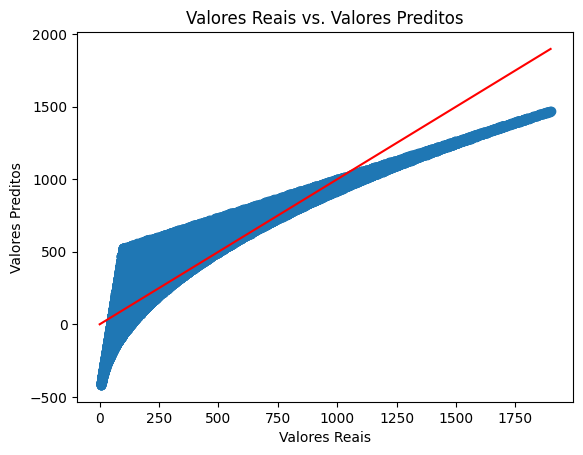

In [ ]:
# 7. Fazer Previsões
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Valores Reais vs. Valores Preditos')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red')  # Linha de referência
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Dividir os dados normalizados em conjuntos de treinamento e teste
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Treinar o modelo de regressão linear novamente
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Avaliar o modelo
y_pred_scaled = model_scaled.predict(X_test_scaled)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

In [ ]:
print(f'Mean Squared Error (Normalizado): {mse_scaled}')
print(f'R² Score (Normalizado): {r2_scaled}')

Mean Squared Error (Normalizado): 22498.125656910033
R² Score (Normalizado): 0.8764796569572559


In [ ]:
# Cálculo dos resíduos
residuos = y_test - y_pred_scaled

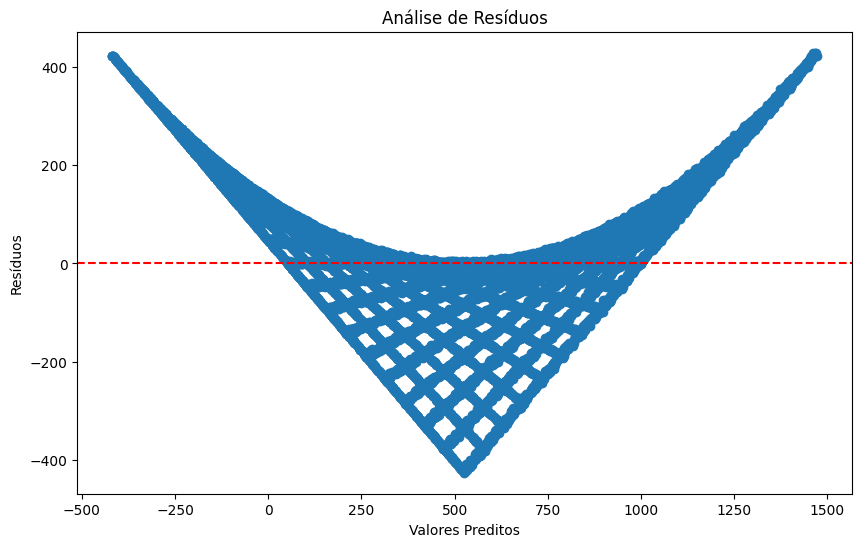

In [ ]:
# Plotar os resíduos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_scaled, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.title('Análise de Resíduos')
plt.show()

#Modelo de Árvores de Decisão

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Treinar um modelo de árvore de decisão
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Avaliar o modelo de árvore de decisão
y_pred_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

In [ ]:
print(f'Mean Squared Error (Árvore de Decisão): {mse_tree}')
print(f'R² Score (Árvore de Decisão): {r2_tree}')

Mean Squared Error (Árvore de Decisão): 0.172184091092152
R² Score (Árvore de Decisão): 0.9999990546662276


1. Mean Squared Error (MSE)
Valor: 0.1722
Interpretação: Um MSE tão baixo indica que as previsões do modelo estão muito próximas dos valores reais. Isso sugere que a Árvore de Decisão está se ajustando extremamente bem aos dados.
2. R² Score
Valor: 0.999999
Interpretação: Um R² tão alto (próximo de 1) significa que o modelo explica praticamente toda a variação nos dados. Isso é um sinal claro de que o modelo de Árvore de Decisão está capturando a relação entre as variáveis independentes e a variável dependente de forma muito eficaz.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Treinar um modelo de Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Avaliar o modelo de Random Forest
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [ ]:
print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'R² Score (Random Forest): {r2_rf}')

Mean Squared Error (Random Forest): 0.045378979888358734
R² Score (Random Forest): 0.9999997508580382


1. Mean Squared Error (MSE)
Valor: 0.0454
Interpretação: Um MSE tão baixo indica que as previsões do modelo de Random Forest estão extremamente próximas dos valores reais, mostrando que ele é muito eficaz em prever o total de vendas.
2. R² Score
Valor: 0.99999975
Interpretação: Um R² quase igual a 1 sugere que o modelo está explicando praticamente toda a variação nos dados. Isso significa que o Random Forest é capaz de capturar a relação entre as variáveis independentes e a variável dependente com alta precisão.

#Validação Cruzada com K-Fold

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Validação cruzada para Árvore de Decisão
tree_cv_scores = cross_val_score(tree_model, X, y, cv=5, scoring='neg_mean_squared_error')
tree_cv_mse = -tree_cv_scores.mean()
print(f'Mean Squared Error (Árvore de Decisão) - Validação Cruzada: {tree_cv_mse}')

Mean Squared Error (Árvore de Decisão) - Validação Cruzada: 0.1767243193373989


In [ ]:
# Validação cruzada para Random Forest
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
rf_cv_mse = -rf_cv_scores.mean()
print(f'Mean Squared Error (Random Forest) - Validação Cruzada: {rf_cv_mse}')

Mean Squared Error (Random Forest) - Validação Cruzada: 0.04462170604469399


In [ ]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

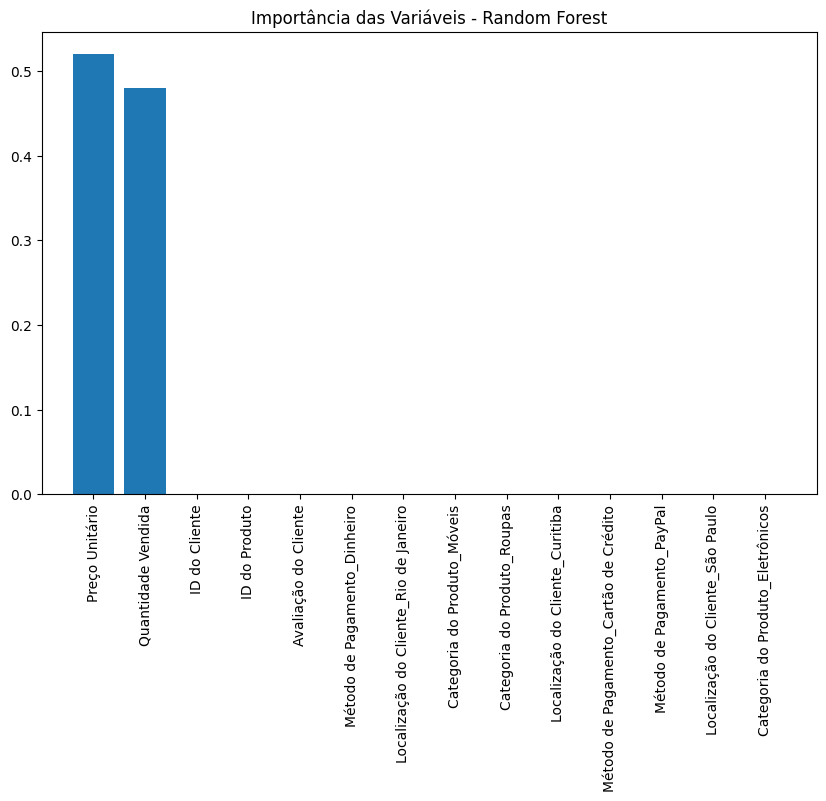

In [ ]:
# Visualização da importância das variáveis
plt.figure(figsize=(10, 6))
plt.title("Importância das Variáveis - Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

#Interpretação do Gráfico#
Variáveis Mais Importantes:
Preço Unitário e Quantidade Vendida têm a maior importância, com valores significativamente mais altos em comparação com as outras variáveis. Isso indica que essas características são os principais determinantes nas previsões do total de vendas.

Menor Importância:
As variáveis como Método de Pagamento, Localização do Cliente, e categorias de produtos como Móveis e Eletrônicos têm importâncias muito menores. Isso sugere que essas características têm uma contribuição menor para a previsão do total de vendas no contexto do seu modelo.